# 10章 学習済みモデルVGG16を転移学習して犬猫画像の判定モデルを構築しよう #1

In [4]:
# 非常に深いネットワーク構造を持っているため、「VGG16」と呼ばれます。「16」は、ネットワーク内の重み付けされたレイヤーの数を表しています。


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 2s 0us/step


In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

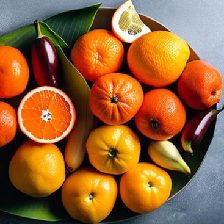

In [7]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/unknown_vgg.jpg', target_size=(224, 224))
unknown_img


In [8]:
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)
unknown_array.shape


(224, 224, 3)

In [9]:
unknown_array = unknown_array.reshape((1, 224, 224, 3))
unknown_array.shape


(1, 224, 224, 3)

In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input
unknown_array = preprocess_input(unknown_array)


In [11]:
result = model.predict(unknown_array)
result

1/1 [==============================] - 0s 334ms/step


array([[1.11726131e-08, 4.89427066e-07, 3.93453625e-09, 8.92250884e-10,
        1.65927314e-10, 8.15081114e-10, 7.50461193e-10, 3.83193175e-08,
        3.24302363e-07, 2.16292831e-10, 1.27581634e-08, 2.96109324e-08,
        9.11741260e-09, 2.54533750e-09, 7.84282417e-09, 8.52194091e-07,
        3.27273540e-07, 2.91349043e-08, 9.65546718e-08, 1.64875924e-09,
        3.73939590e-09, 5.76808323e-10, 3.87635063e-10, 5.61217794e-10,
        6.26215080e-10, 5.91525406e-09, 1.81358328e-09, 2.73655698e-09,
        4.16831236e-09, 1.01353814e-08, 1.54445257e-09, 3.66639235e-08,
        1.60666591e-09, 2.15358487e-09, 6.11601791e-09, 2.35708519e-09,
        2.15745857e-08, 2.24179377e-08, 1.97571917e-10, 9.47195122e-09,
        7.22531368e-09, 1.47336721e-09, 5.07124454e-10, 1.77939441e-09,
        1.58130967e-10, 2.26415930e-09, 1.84122353e-08, 3.39398909e-09,
        1.72228037e-10, 1.42641665e-09, 1.43496881e-09, 4.02677314e-09,
        1.30944300e-09, 7.08685666e-10, 8.61748173e-10, 9.638616

In [12]:
from tensorflow.keras.applications.vgg16 import decode_predictions
decode_predictions(result)


35363/35363 [==============================] - 0s 0us/step


[[('n07747607', 'orange', 0.84372014),
  ('n07753592', 'banana', 0.065719925),
  ('n07749582', 'lemon', 0.044244636),
  ('n07753275', 'pineapple', 0.028791714),
  ('n07716906', 'spaghetti_squash', 0.003175098)]]

## 10.4 VGG16を転移学習する流れのイメージ

# 11章 学習済みモデルVGG16を転移学習して犬猫画像の判定モデルを構築しよう #2

In [13]:
from tensorflow.keras import utils
utils.set_random_seed(0)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16

In [15]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)

In [16]:
train_generator = datagen.flow_from_directory(
    '/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16/data_train',
    subset="training",
    target_size=(256, 256),
    batch_size=64)

Found 384 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [18]:
val_generator = datagen.flow_from_directory(
        '/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16/data_train',
        subset='validation',
        target_size=(256, 256),
        batch_size=64)

Found 128 images belonging to 2 classes.


In [19]:
test_generator = datagen.flow_from_directory(
        '/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16/data_test',
        target_size=(256, 256),
        batch_size=64)

Found 128 images belonging to 2 classes.


## 11.7 VGG16の全結合層以外の取得

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_without_fc = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


## 11.8 予測モデル(全結合層を除くVGG16)の可視化

In [21]:
vgg16_without_fc.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

## 11.9 VGG16のSequentialモデルへの変換

In [22]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in vgg16_without_fc.layers:
    model.add(layer)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)       2

## 11.10 vgg16のパラメータ凍結

In [24]:
for layer in model.layers:
    layer.trainable = False

## 11.11 独自の全結合層の追加

In [25]:
from tensorflow.keras.layers import Flatten, Dense
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))

## 11.12 予測モデル(VGG16 + 独自の全結合層)の可視化

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)       2

## 11.13 誤差関数・最適化方法・評価指標の設定

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## 11.14 学習

In [28]:
history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5)

Epoch 1/5
6/6 [==============================] - 59s 10s/step - loss: 3.3933 - accuracy: 0.5286 - val_loss: 1.6558 - val_accuracy: 0.5078
Epoch 2/5
6/6 [==============================] - 12s 2s/step - loss: 0.7937 - accuracy: 0.7578 - val_loss: 0.5137 - val_accuracy: 0.9062
Epoch 3/5
6/6 [==============================] - 12s 2s/step - loss: 0.3952 - accuracy: 0.9167 - val_loss: 0.2417 - val_accuracy: 0.8984
Epoch 4/5
6/6 [==============================] - 12s 2s/step - loss: 0.2119 - accuracy: 0.9479 - val_loss: 0.2427 - val_accuracy: 0.9297
Epoch 5/5
6/6 [==============================] - 12s 2s/step - loss: 0.1172 - accuracy: 0.9766 - val_loss: 0.1854 - val_accuracy: 0.9297


<Axes: >

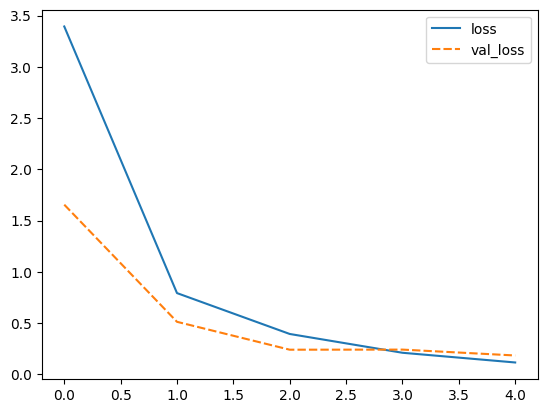

In [29]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(history.history)
sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

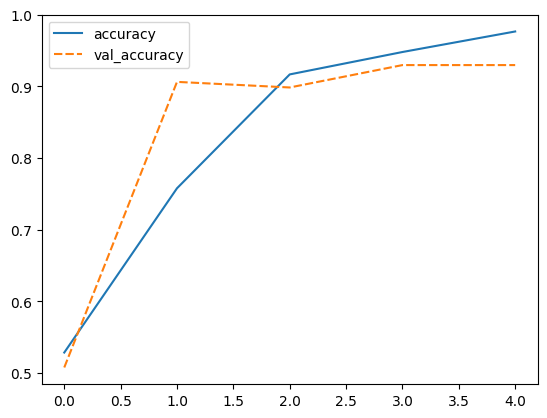

In [30]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [31]:
model.evaluate(test_generator)

2/2 [==============================] - 16s 15s/step - loss: 0.3155 - accuracy: 0.8359


[0.31554895639419556, 0.8359375]

## 11.16 予測
* 省略

## 11.17 予測モデルの保存と読み込み

In [32]:
model.save('/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16/model.keras')

In [33]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/vgg16/model.keras')